<a href="https://colab.research.google.com/github/pennya6/CJ_project/blob/main/%EC%9B%94%EB%B3%84_%EA%B2%80%EC%83%89_%EC%B6%94%EC%9D%B4%EB%9F%89_%EB%BD%91%EA%B8%B0_%EC%84%B8%EB%8C%80%EB%B3%84_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [4]:
top10_3_1=pd.read_csv("/content/drive/Shareddrives/2021 CJ 대한통운 공모전/data/crawling_data/top10/3개_세대별/3월/3_01.csv")

In [5]:
top10_3_1

,순위,1,2,3
0,1,나이키바람막이,원피스,원피스
1,2,바람막이,트위드자켓,트위드자켓
2,3,트렌치코트,트렌치코트,써스데이아일랜드원피스
3,4,원피스,블라우스,쥬시쥬디
4,5,트위드자켓,롱원피스,블라우스
5,6,후드집업,나이키바람막이,올리비아로렌
6,7,나이키맨투맨,여자트렌치코트,여성가디건
7,8,나이키후드집업,여성트레이닝세트,발렌시아
8,9,폴로가디건,여성가디건,모조에스핀
9,10,잠옷,바람막이,여성경량패딩


In [6]:
import os
import sys
import urllib.request
import json
import pandas as pd

In [7]:
client_id="l54OU3RyAxGlGgRaggwl"
client_secret="rMEF6wnAEF"
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-07\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}]}";

In [8]:
import matplotlib.pyplot as plt

In [11]:
url = "https://openapi.naver.com/v1/datalab/search";
body = "{\"startDate\":\"2021-03-01\",\"endDate\":\"2021-03-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"CJ\",\"keywords\":[\"CJ\"]}],\"ages\":[\"1\",\"2\",\"3\",\"4\"]}";
json_body=json.loads(body)


In [12]:
for keyword in json_body['keywordGroups']:
  keyword['groupName']=top10_3_1['1'][0]
  keyword['keywords']=list(top10_3_1.loc[:0,'1'])

In [13]:
keyword['keywords']

['나이키바람막이']

In [14]:
json_body

{'ages': ['1', '2', '3', '4'],
 'endDate': '2021-03-31',
 'keywordGroups': [{'groupName': '나이키바람막이', 'keywords': ['나이키바람막이']}],
 'startDate': '2021-03-01',
 'timeUnit': 'date'}

In [15]:
body=json.dumps(json_body,ensure_ascii=False)

In [16]:
body=str(body)

In [17]:
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    output_data=response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [18]:

result=json.loads(output_data)

In [19]:

result

{'endDate': '2021-03-31',
 'results': [{'data': [{'period': '2021-03-01', 'ratio': 76.30494},
    {'period': '2021-03-02', 'ratio': 53.04487},
    {'period': '2021-03-03', 'ratio': 52.1749},
    {'period': '2021-03-04', 'ratio': 52.58699},
    {'period': '2021-03-05', 'ratio': 49.26739},
    {'period': '2021-03-06', 'ratio': 75.93864},
    {'period': '2021-03-07', 'ratio': 89.99542},
    {'period': '2021-03-08', 'ratio': 76.39652},
    {'period': '2021-03-09', 'ratio': 70.69597},
    {'period': '2021-03-10', 'ratio': 80.79212},
    {'period': '2021-03-11', 'ratio': 81.54761},
    {'period': '2021-03-12', 'ratio': 66.57509},
    {'period': '2021-03-13', 'ratio': 82.57783},
    {'period': '2021-03-14', 'ratio': 100},
    {'period': '2021-03-15', 'ratio': 86.03479},
    {'period': '2021-03-16', 'ratio': 80.56318},
    {'period': '2021-03-17', 'ratio': 74.45054},
    {'period': '2021-03-18', 'ratio': 68.06318},
    {'period': '2021-03-19', 'ratio': 66.43772},
    {'period': '2021-03-20', '

In [20]:
date = [a['period'] for a in result['results'][0]['data']]

ratio = [a['ratio'] for a in result['results'][0]['data']]

new=pd.DataFrame({'date':date, 
              'output':ratio})

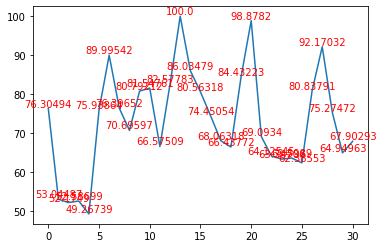

In [21]:
import matplotlib.pyplot as plt

plt.plot(new.index,new['output'])

for x,y in enumerate(list(new['output'])):
  plt.text(x,y,y,fontsize=10,color="#ff0000",horizontalalignment='center',verticalalignment='bottom')

plt.show()